In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
np.random.seed(33)
random.seed(33)

# Pre-process data

In [3]:
df = pd.read_csv("./diabetes.csv")

In [4]:
X = df.drop(columns=["class"])

y = df["class"]
y = y.apply(lambda x: 0 if x == 'tested_negative' else 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train decision tree model and print precision

In [6]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [7]:
clf = clf.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print(f"A precisão do modelo foi: {precision_score(y_test, y_pred, pos_label=1)}")

A precisão do modelo foi: 0.75


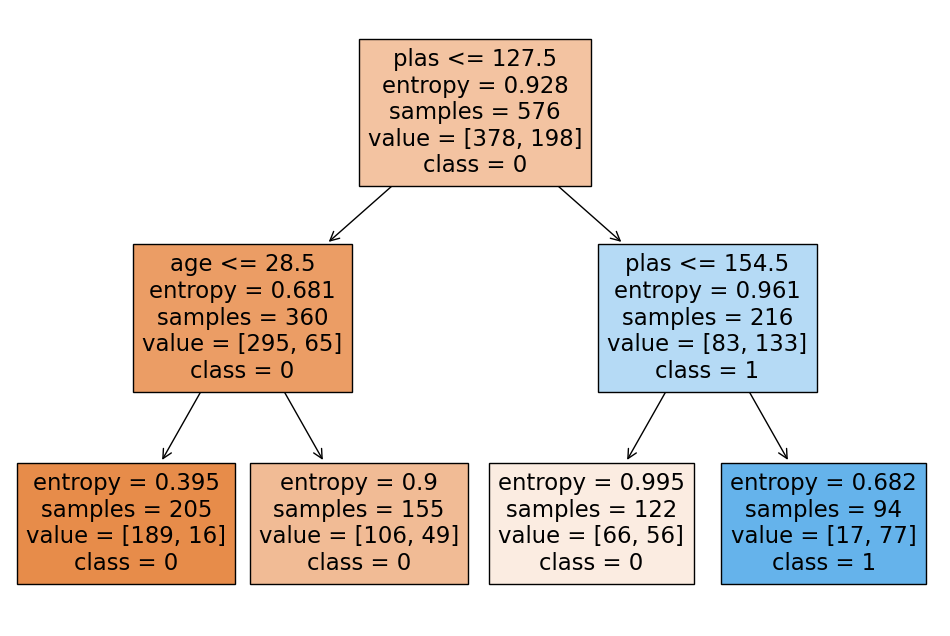

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True)
plt.show()

# Plot ROC curve


In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

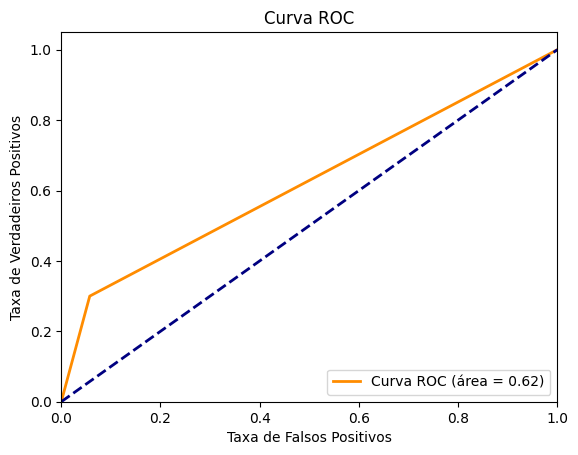

In [12]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.tree import _tree

def tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left = tree_.children_left[node]
            right = tree_.children_right[node]
            rules.append((name, "<=", threshold, left))
            rules.append((name, ">", threshold, right))
            recurse(left)
            recurse(right)

    recurse(0)
    return rules

In [14]:
rules = tree_rules(clf, X_train.columns)
for rule in rules:
    name, operator, threshold, node = rule
    classes = clf.tree_.value[node][0]
    total = classes.sum()
    if total == 0:
        continue
    support = total / clf.tree_.n_node_samples[0]
    confidence = classes[np.argmax(classes)] / total
    print(f"Regra: Se {name} {operator} {threshold} então classe = {np.argmax(classes)}")
    print(f"Suporte: {support}")
    print(f"Confiança: {confidence}")
    print()

Regra: Se plas <= 127.5 então classe = 0
Suporte: 0.625
Confiança: 0.8194444444444444

Regra: Se plas > 127.5 então classe = 1
Suporte: 0.375
Confiança: 0.6157407407407407

Regra: Se age <= 28.5 então classe = 0
Suporte: 0.3559027777777778
Confiança: 0.9219512195121952

Regra: Se age > 28.5 então classe = 0
Suporte: 0.2690972222222222
Confiança: 0.6838709677419355

Regra: Se plas <= 154.5 então classe = 0
Suporte: 0.21180555555555555
Confiança: 0.5409836065573771

Regra: Se plas > 154.5 então classe = 1
Suporte: 0.16319444444444445
Confiança: 0.8191489361702128

